In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from plotly import offline
from plotly import graph_objs as go
from plotly import express as px

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df = df.drop('region',axis=1)

In [6]:
df

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [7]:
df.groupby("sex").agg(Minimum_Charges=("charges","min"),Maximum_Charges=("charges","max"),Average_Charges=("charges","mean")).reset_index()

,sex,Minimum_Charges,Maximum_Charges,Average_Charges
0,female,1607.5101,63770.42801,12569.578844
1,male,1121.8739,62592.87309,13956.751178


**Takeaway: Males have higher average charges for insurance.**


In [8]:
df.loc[(df["age"]>=10)&(df["age"]<=19),"in_age"]="in 10's"
df.loc[(df["age"]>=20)&(df["age"]<=29),"in_age"]="in 20's"
df.loc[(df["age"]>=30)&(df["age"]<=39),"in_age"]="in 30's"
df.loc[(df["age"]>=40)&(df["age"]<=49),"in_age"]="in 40's"
df.loc[(df["age"]>=50)&(df["age"]<=59),"in_age"]="in 50's"
df.loc[(df["age"]>=60)&(df["age"]<=69),"in_age"]="in 60's"

In [9]:
age=df.groupby("in_age").agg(Frequency=("in_age","count")).reset_index()
age

,in_age,Frequency
0,in 10's,137
1,in 20's,280
2,in 30's,257
3,in 40's,279
4,in 50's,271
5,in 60's,114


In [10]:
def create_sunburst(df,path:list,values,title):
    """ Creating sunburst chart using plotly python"""
    fig=px.sunburst(df,path=path,values=values)
    fig.update_layout(title=title,title_x=0.5)
    fig.show()

In [11]:
create_sunburst(age,["in_age","Frequency"],"Frequency","Age Distribution")

In [12]:
!pip install catboost

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,PassiveAggressiveRegressor,TweedieRegressor,HuberRegressor,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor,VotingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score


In [15]:
le =LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])

df

,age,sex,bmi,children,smoker,charges,in_age
0,19,0,27.900,0,1,16884.92400,in 10's
1,18,1,33.770,1,0,1725.55230,in 10's
2,28,1,33.000,3,0,4449.46200,in 20's
3,33,1,22.705,0,0,21984.47061,in 30's
4,32,1,28.880,0,0,3866.85520,in 30's
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,in 50's
1334,18,0,31.920,0,0,2205.98080,in 10's
1335,18,0,36.850,0,0,1629.83350,in 10's
1336,21,0,25.800,0,0,2007.94500,in 20's


In [16]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
in_age      0
dtype: int64

In [17]:
df.duplicated().sum()

1

In [18]:
df = df.drop_duplicates()

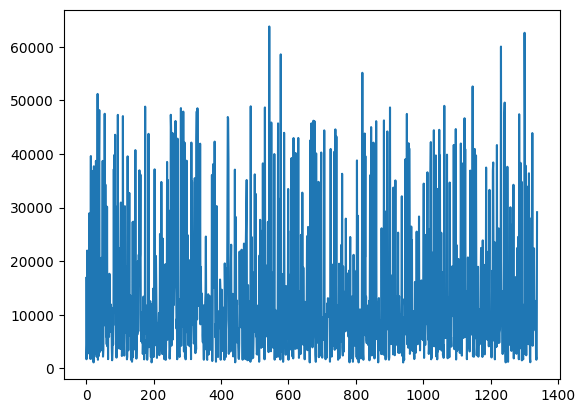

In [19]:
plt.plot(df['charges'])

C:\Users\Nirmit Gupta\AppData\Local\Temp\ipykernel_28832\1359265618.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='children', ylabel='Density'>

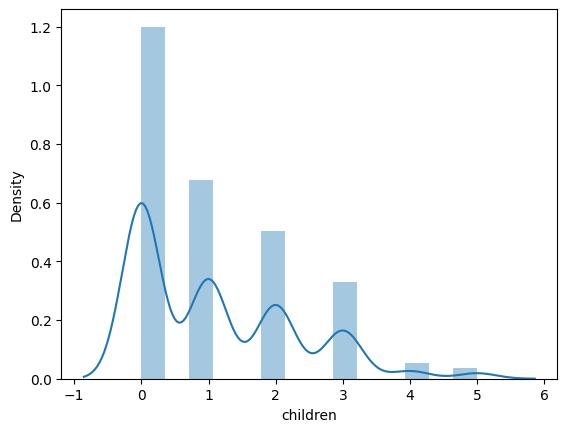

In [23]:
import seaborn as sns
sns.distplot(df['children'])

C:\Users\Nirmit Gupta\AppData\Local\Temp\ipykernel_28832\3234920688.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot:xlabel='age', ylabel='Density'>

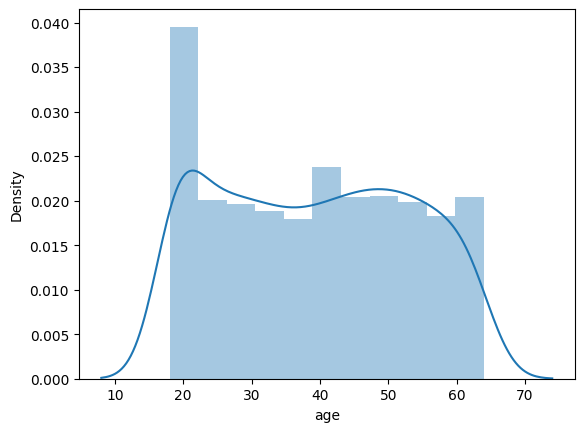

In [24]:
sns.distplot(df['age'])

In [25]:
df= df.drop("in_age",axis=1)

In [26]:
x=df.drop('charges',axis=1)
y=df['charges']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler,RobustScaler

In [29]:
sc =StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [30]:

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.804621881177266

In [31]:
pa = PassiveAggressiveRegressor()
pa.fit(x_train,y_train)
pa.score(x_test,y_test)

0.7776927034966898

In [32]:
r = Ridge()
r.fit(x_train,y_train)
r.score(x_test,y_test)

0.8044415056732005

In [33]:
l= Lasso()
l.fit(x_train,y_train)
l.score(x_test,y_test)

0.8045947642716651

In [34]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.7587562914761687

In [35]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

0.8624312320801821

In [36]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8702789519253883

In [37]:
gb = GradientBoostingRegressor(n_estimators=250, loss='huber')
gb.fit(x_train,y_train)
gb.score(x_test,y_test)

0.9038150779985178

In [38]:
a = AdaBoostRegressor()
a.fit(x_train,y_train)
a.score(x_test,y_test)

0.8689987236060515

In [39]:
xg = XGBRegressor(learning_rate=0.05,n_estimators=150, random_state=100)
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

[21:51:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9012921816231286

In [40]:
lg = lgb.LGBMRegressor()
lg.fit(x_train,y_train)
lg.score(x_test,y_test)

0.8827082250626199

In [41]:
cat = CatBoostRegressor(verbose=0)
cat.fit(x_train,y_train)
cat.score(x_test,y_test)

0.882369323008791

In [42]:
st = StackingRegressor([('gb',gb),('xgb',xg)])
st.fit(x_train,y_train)
st.score(x_test,y_test)

[21:52:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:52:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:52:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:52:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:52:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:52:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.906546419146029

In [43]:
y_pred = st.predict(x_test)

In [44]:
r2_score(y_test,y_pred)

0.906546419146029

In [45]:
import pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(st, files)

In [46]:
df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [47]:
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [48]:
x.to_csv('df.csv')

In [49]:
data = pd.read_csv('insurance.csv')

In [50]:
data = data.drop(columns=['region','charges'],axis=1)

In [51]:
data

,age,sex,bmi,children,smoker
0,19,female,27.900,0,yes
1,18,male,33.770,1,no
2,28,male,33.000,3,no
3,33,male,22.705,0,no
4,32,male,28.880,0,no
...,...,...,...,...,...
1333,50,male,30.970,3,no
1334,18,female,31.920,0,no
1335,18,female,36.850,0,no
1336,21,female,25.800,0,no


In [52]:
data.to_csv('raw.csv')

In [54]:
booster =xg.get_booster()

In [55]:
booster.save_model('insurance.bin')

In [56]:
import pickle
with open('model.pkl', 'wb') as files:
    pickle.dump(gb, files)